In [21]:
import yaml
import os
import numpy as np

from roadvision3d.src.engine.dataloader import build_dataloader
from roadvision3d.src.datasets.kitti import KITTI
from roadvision3d.src.datasets.dair_kitti import DAIR_KITTI

from roadvision3d.visualization import Visualizer_dataloader

import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
import cv2

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load config and build dataloader

In [22]:
config_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/MonoLSS_DAIR_KITTI_150e.yaml'

# load config
assert (os.path.exists(config_path))
cfg = yaml.load(open(config_path, 'r'), Loader=yaml.Loader)

# build dataloader or load de data manually
dataset = DAIR_KITTI(split='train', cfg=cfg['dataset'])

Resolution init: [1920 1088]


In [23]:
print(dataset.idx_list)

item = 1395

print(dataset.idx_list[item])

['000420', '007091', '008237', '004041', '009156', '001581', '001901', '004617', '007985', '001402', '004537', '008551', '008189', '002121', '006714', '004443', '007908', '006745', '004552', '005430', '001699', '007820', '006399', '009279', '009537', '003528', '000131', '003329', '002659', '005131', '000898', '005338', '001481', '008263', '004317', '003840', '004582', '001293', '008301', '003798', '002870', '002668', '007378', '000024', '004320', '006613', '004716', '000238', '003152', '002252', '006291', '003464', '008613', '000534', '002128', '003226', '008205', '004662', '007464', '005446', '004318', '006946', '009967', '004972', '003770', '008434', '006302', '008199', '006351', '005901', '008341', '006971', '007216', '009988', '004098', '005764', '005346', '002026', '006273', '003873', '007931', '008259', '006050', '002591', '005945', '007825', '006586', '005458', '004975', '006735', '007472', '003001', '005837', '009989', '008693', '000187', '000733', '006502', '003931', '000665',

In [24]:
inputs, calib, coord_range, targets, info = dataset.__getitem__(item)
print(inputs.shape)
print(targets.keys())

(3, 1088, 1920)
dict_keys(['depth', 'size_2d', 'heatmap', 'offset_2d', 'indices', 'size_3d', 'offset_3d', 'heading_bin', 'heading_res', 'cls_ids', 'mask_2d', 'vis_depth', 'rotation_y', 'position'])


In [25]:
valid_size_2d = targets['size_2d'][targets['mask_2d']==1]

print(targets['cls_ids'])
print(valid_size_2d)
print(targets['mask_2d'].shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[27.226364 25.635193]
 [77.95924  60.873215]
 [19.35704  19.072937]
 [10.840485 21.66452 ]
 [25.732262 22.606667]
 [ 9.727142 21.392899]
 [36.181183 23.17585 ]
 [51.39424  57.135925]
 [32.78296  27.97853 ]
 [44.6998   47.649826]
 [ 8.020752 21.309418]
 [ 9.428955  8.977917]
 [57.103607 45.533447]
 [21.894302 21.355774]
 [29.673325 29.942291]
 [17.593582 12.95969 ]]
(100,)


In [26]:
visualizer = Visualizer_dataloader(calib=calib, pitch=0.228, cfg=cfg['dataset'])

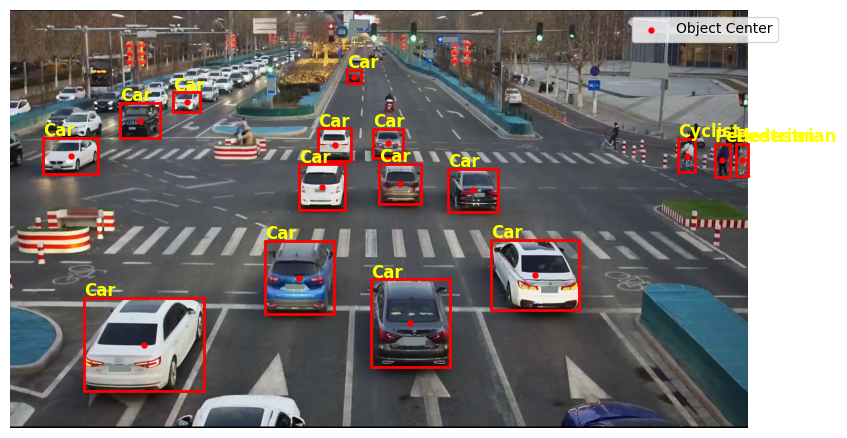

In [27]:
visualizer.draw_2d_bboxes(inputs, targets)

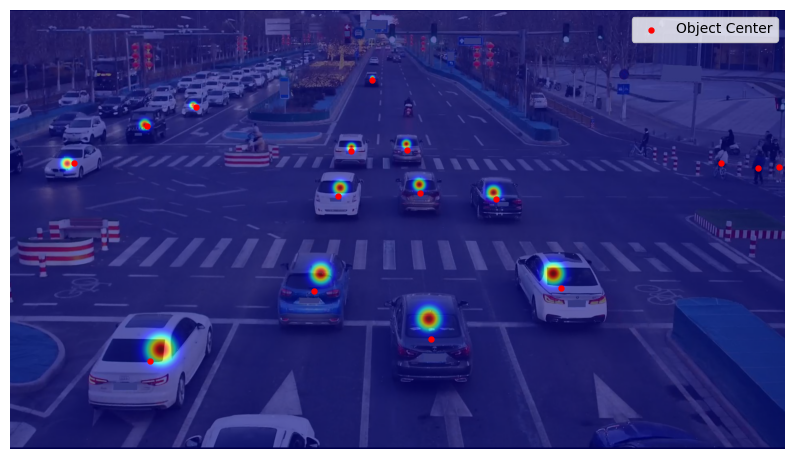

In [28]:
visualizer.draw_heatmaps(inputs, targets)

Object ID: 0
  Depth: 39.53 meters
  3D Size (width, height, length): 1.60, 1.89, 4.22
  Rotation Y (Yaw): -1.55 radians
  Reconstructed Rotation Y: 4.70 radians
  Heading Bin: 9, Heading Residual: -0.01
------------------------------------------------------------
Object ID: 1
  Depth: 19.41 meters
  3D Size (width, height, length): 1.51, 2.01, 4.50
  Rotation Y (Yaw): -1.53 radians
  Reconstructed Rotation Y: 5.01 radians
  Heading Bin: 10, Heading Residual: -0.22
------------------------------------------------------------
Object ID: 2
  Depth: 52.62 meters
  3D Size (width, height, length): 1.50, 1.82, 4.23
  Rotation Y (Yaw): -1.58 radians
  Reconstructed Rotation Y: 4.69 radians
  Heading Bin: 9, Heading Residual: -0.02
------------------------------------------------------------
Object ID: 3
  Depth: 47.58 meters
  3D Size (width, height, length): 1.64, 0.65, 1.80
  Rotation Y (Yaw): -1.52 radians
  Reconstructed Rotation Y: 4.40 radians
  Heading Bin: 8, Heading Residual: 0.21
-

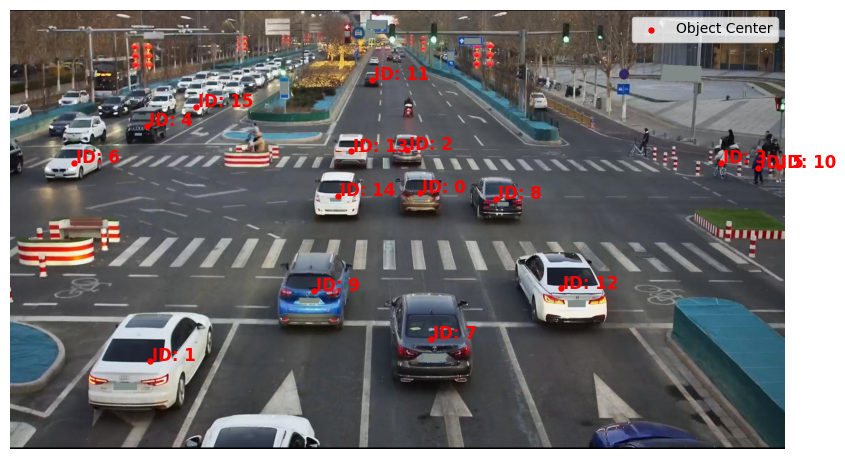

In [29]:
visualizer.display_centers_dimensions_depth(inputs, targets)

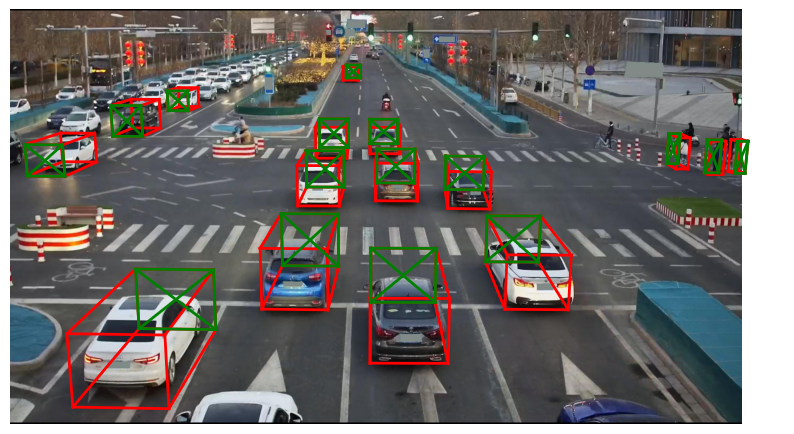

In [30]:
visualizer.draw_3d_bboxes(inputs, targets)
